Accuracy: 0.7857
Precision: 0.7727
Recall: 0.8095
F1 Score: 0.7907
Confusion Matrix:
[[32 10]
 [ 8 34]]


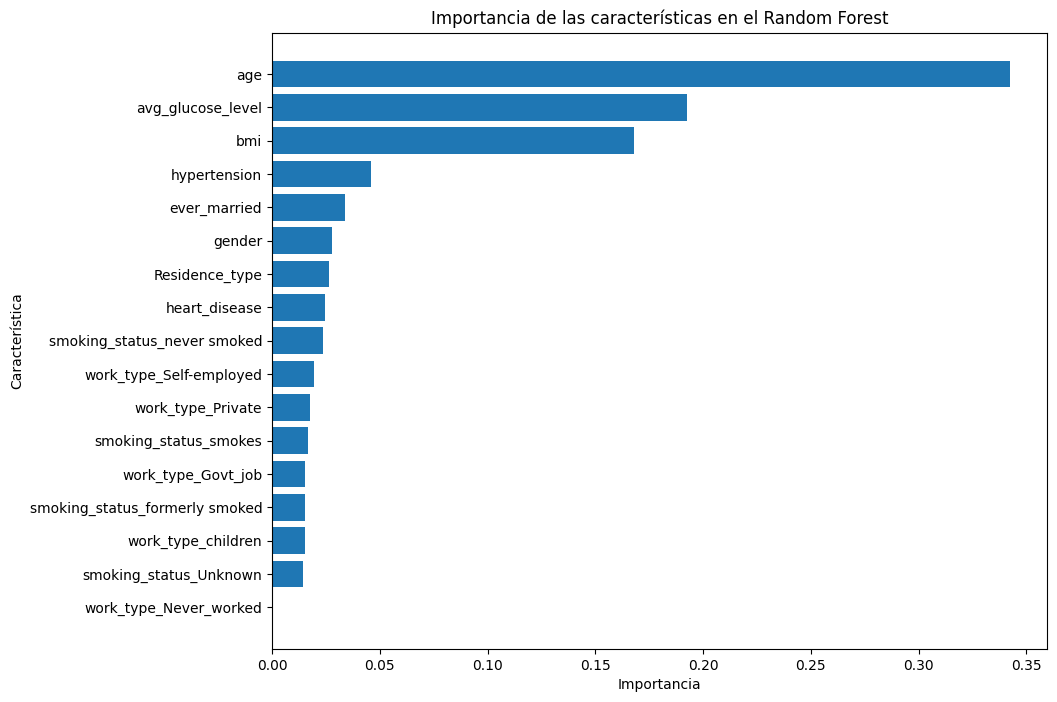

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from metrics_module import metrics
import matplotlib.pyplot as plt
import numpy as np

from dataloader_module import load_data

# Load and preprocess data
datafile = "data/healthcare-dataset-stroke-data.csv"
X, y = load_data(datafile)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict and calculate metrics
y_pred = clf.predict(X_test)

np.save('predictions/predictions_random_forest.npy', y_pred)

accuracy, precision, recall, f1, conf_matrix = metrics(y_test, y_pred, print_metrics=True)

# Visualize feature importances
feature_importances = clf.feature_importances_
feature_importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.title('Importancia de las características en el Random Forest')
plt.gca().invert_yaxis()
plt.show()

In [4]:
from sklearn.model_selection import cross_val_score

# Definir el modelo
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Realizar k-fold cross validation
k = 5
cv_scores = cross_val_score(clf, X, y, cv=k)

# Imprimir los resultados
print(f"Scores for each fold: {cv_scores}")
print(f"Mean accuracy: {cv_scores.mean()}")
print(f"Standard deviation: {cv_scores.std()}")

Scores for each fold: [0.69047619 0.76190476 0.78571429 0.79518072 0.71084337]
Mean accuracy: 0.7488238668961561
Standard deviation: 0.041298765442236755


In [5]:
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score

# Definir el modelo
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Definir el Leave-One-Out Cross-Validation
loo = LeaveOneOut()

# Listas para almacenar los resultados
y_true, y_pred = [], []

# Realizar LOO-CV
for train_index, test_index in loo.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    clf.fit(X_train, y_train)
    y_pred.append(clf.predict(X_test)[0])
    y_true.append(y_test.values[0])

# Calcular la precisión
loo_accuracy = accuracy_score(y_true, y_pred)

# Imprimir los resultados
print(f"Leave-One-Out Cross-Validation Accuracy: {loo_accuracy}")

Leave-One-Out Cross-Validation Accuracy: 0.7583732057416268
